# Requisitos

Vamos a instalar las librerías necesarias

```bash
conda install pandas fiona shapely pyproj rtree geopandas
conda install contextily --channel conda-forge
```

y luego a cargarlas

In [2]:
import pandas as pd, matplotlib.pyplot as plt, geopandas as gpd, contextily as ctx, numpy as np

# Información geográfica y mapas

## Introducción

En esta clase abordaremos el análisis y visualización de
información geográfica. Aquí incursionaremos en el dominio de los SIG
(“Sistemas de Información Geográfica”) también conocidos como GIS por sus
siglas en inglés.

Hasta hace poco tiempo, labores como la producción de mapas y el análisis
espacial estaban reservadas para especialistas, debido a la complejidad de
las tareas y al alto costo de producción y adquisición de datos geográficos.
Pero durante las dos últimas décadas la tecnología digital cambió el
panorama. Una dramática caída en el costo asociado a adquirir y procesar
información geográfica (pensemos en satélites y computadoras multiplicándose
y bajando de precio) dio paso al mapa digital como herramienta universal. El
consumo de sofisticados mapas y otros productos geográficos se volvió masivo
y cotidiano, con Google Maps como el exponente más conocido. Apenas había
pasado la novedad de disponer de mapas en alta resolución de todo el mundo
accesibles al instante desde nuestros escritorios, cuando la llegada de los
smartphones popularizó el acceso en cualquier momento y lugar.

El mismo proceso que nos convirtió a todos en consumidores constantes de
información geográfica también nos da la oportunidad de ser los productores.
Sin dudas, hacer mapas se ha vuelto más fácil que nunca antes. Existen cada
vez más repositorios con información georreferenciada de acceso publico
-datasets que incluyen información precisa sobre su ubicación geográfica. Al
mismo tiempo, maduran y se hacen más fáciles de usar las herramientas para
análisis y visualización espacial.

En los procesos sociales, el “dónde” suele ser un aspecto clave. Es central
para quienes estudiamos -por ejemplo- las ciudades o las dinámicas de la
política, siempre tan arraigadas a lo territorial. Esto vuelve al mapa una
de las herramientas de visualización más importantes que podemos emplear.

En python contamos con varios paquete de funciones que permiten manipular
información espacial con facilidad. A continuación vamos a aprender a
combinarlos con las herramientas que ya hemos aprendido, para hacer análisis
geográfico y crear nuestros propios mapas.



## Los datos georreferenciados

El atributo que distingue a los datos georreferenciados, lo que los hace
merecer ese nombre, es que representan ubicaciones exactas sobre la
superficie de la Tierra. Representar en forma precisa una posición sobre la
superficie terrestre es un todo un reto. Para empezar, la Tierra tiene una
forma irregular. A pesar de cómo solemos imaginarla y dibujarla, no es una
esfera perfecta sino que está “achatada” en los polos, dificultando la
matemática necesaria para comparar posiciones y medir distancias. Luego,
está el problema de cómo mostrar sobre papel impreso, o en una pantalla
digital, -superficies planas- rasgos geográficos que pertenecen a una
superficie tridimensional esférica. La solución a estos problemas toma la
forma de sistemas de coordenadas de referencia (CRS por sus siglas en
inglés), y de proyecciones cartográficas.

Los CRS son un sistema de números que definen ubicaciones sobre la
superficie de la Tierra; funcionan como direcciones. El tipo de CRS más
conocido es el que usa latitud y longitud, para definir posiciones en los
ejes norte-sur y este-oeste.

Las proyecciones cartográficas son instrucciones para traducir a un plano la
disposición de puntos ubicados en la esfera terrestre. Algo así como las
instrucciones para dibujar en dos dimensiones las disposición de fronteras,
accidentes geográficos, calles o cualquier otro objeto que se extiende sobre
la superficie curva del planeta. Como en toda traducción, hay algo que se
pierde en el proceso. Todo los mapas “mienten”, en el sentido en que
presentan una versión distorsionada de la superficie de terrestre. Esto es
inevitable; no existe forma de pasar de la esfera al plano sin distorsionar
la forma, la superficie, la distancia o la dirección de los rasgo
geográficos. Existen muchísimas proyecciones distintas, cada una pensada
para minimizar alguno de los tipos de distorsión, o para encontrar una
solución de compromiso que los balancee.



![](extra/proyecciones.png)

<div align="center">
Distintos sistemas de proyección cartográfica (cortesía Daniel R. Strebe 2011)
</div>


La proyección más famosa es la Mercator, diseñada para asistir la navegación
marítima y en uso desde el siglo XVI. Su fuerte es que no distorsiona las
direcciones, por lo que permite fijar el rumbo de navegación consultando el
mapa. Su principal problema es que produce una distorsión notable en las
áreas cercanas a los polos: Groenlandia aparenta el mismo tamaño que toda
África, cuando en realidad tiene sólo un quinceavo de su superficie. Por esa
razón perdió la proyección popularidad en el siglo XX cuando comenzaron a
preferirse proyecciones que respetan las áreas, como las de la Figura 6.1.
Sin embargo, en el siglo XXI la proyección Mercator recuperó protagonismo.
Google la eligió para sus mapas en línea, y por razones de compatibilidad
otros proveedores de mapas digitales la adoptaron también. Así, y para
inconsolable irritación de los geógrafos, Mercator se convirtió en el
estándar de facto para aplicaciones geográficas en la web.



![](extra/Mercator-proj.png)

<div align="center">
Figura 6.2: La inescapable proyección Mercator (cortesía Jecowa) 
</div>



En la práctica, si trabajamos en forma frecuente con archivos
georreferenciados vamos a sufrir tarde o temprano de problemas de
coordenadas o proyección. El más común de ellos: tener una fuentes de datos
geográficos que no podemos comparar con otras, porque desconocemos el
sistema de coordenadas que se usó para crearla; es decir, no podemos saber a
que posición sobre el planeta corresponde cada observación en los datos.



## Formatos de archivo

Otro problema asociado a trabajar con datos geográficos es el de los
formatos de archivo. El formato más común es el denominado “shapefile”,
inventado por la empresa ESRI (los creadores del software ArcGIS). Es un
formato incómodo porque guarda la información en varios archivos distintos,
que suelen ser combinados en un archivo .zip para su distribución. Un
inconveniente aún mayor es que los nombres de las variables en un shapefile
deben tener 10 caracteres o menos, lo que facilita el uso de abreviaturas
ininteligibles. A pesar de éstos y otros detrimentos, el formato es tan
común que se ha vuelto sinónimo de archivo con información geográfica, y
resiste a pesar de los esfuerzos por reemplazarlo con alternativas más
modernas. Una de ellas es “GeoJSON”, un estándar abierto que corrige los dos
inconvenientes mencionados antes. Para nuestros ejercicios usaremos datos
geográficos en esta último formato


## Formatos de archivo

#### Shapefile

Otro problema asociado a trabajar con datos geográficos es el de los
formatos de archivo. El formato más común es el denominado “shapefile”,
inventado por la empresa ESRI (los creadores del software ArcGIS). Es un
formato incómodo porque guarda la información en varios archivos distintos,
que suelen ser combinados en un archivo .zip para su distribución. Un
inconveniente aún mayor es que los nombres de las variables en un shapefile
deben tener 10 caracteres o menos, lo que facilita el uso de abreviaturas
ininteligibles. A pesar de éstos y otros detrimentos, el formato es tan
común que se ha vuelto sinónimo de archivo con información geográfica.

Un shapefile consiste en:

* .shp: archivo que almacena las entidades geométricas de los objetos. 
* .dbf: base de datos, almacena la información de los atributos de los
  objetos.
* .shx: es el archivo que almacena el índice de las entidades geométricas.
* .prj: almacena el sistema de coordenadas de la capa.

#### Geojson

Una de las alternativas al formato shapefile es el formato “GeoJSON”, el
cual soluciona los dos inconvenientes mencionados antes:

Ver: https://tools.ietf.org/html/rfc7946

Ejemplo:

```python
{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "geometry": {
        "type": "Point",
        "coordinates": [102.0, 0.5]
      },
      "properties": {
        "prop0": "value0"
      }
    },
    {
      "type": "Feature",
      "geometry": {
        "type": "LineString",
        "coordinates": [
          [102.0, 0.0], [103.0, 1.0], [104.0, 0.0], [105.0, 1.0]
        ]
      },
      "properties": {
        "prop0": "value0",
        "prop1": 0.0
      }
    },
    {
      "type": "Feature",
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [100.0, 0.0], [101.0, 0.0], [101.0, 1.0],
            [100.0, 1.0], [100.0, 0.0]
          ]
        ]
      },
      "properties": {
        "prop0": "value0",
        "prop1": { "this": "that" }
      }
    }
  ]
}
```

> El sistema de coordenadas de referencia en un geojson debiera ser "World
> Geodetic System 1984 (WGS 84) [WGS84] datum", con las unidades en
> decimales para longitud y latitud (Open Geospatial Consortium (OGC) URN
> urn:ogc:def:crs:OGC::CRS84.) ver RFC 7946: 4.Coordinate Reference System



## Explorando un archivo con información geográfica

Como hemos hecho antes, practicaremos con datos tomados del portal de datos
abiertos de la Ciudad de Buenos Aires. En esta ocasión se trata de los
radios censales de la ciudad. Los radios censales son particiones de la
superficie de la ciudad que contienen una cantidad similar de hogares.
Fueron definidos por el Instituto Nacional de Estadística y Censos (INDEC)
para facilitar la labor durante la jornada del Censo Nacional de Población
que se realiza cada diez años. La idea es asignar a cada censista un radio
censal, estimando que puede recorrer todos los hogares incluidos durante el
día. Los radios censales son la unidad de análisis espacial por excelencia,
debido a que combinan alta granularidad con abundante información asociada
de acceso público, producida como resultado del Censo.


In [3]:
censo = gpd.read_file(
    "dataset/censo2010/radios_censales/Codgeo_CABA_con_datos/cabaxrdatos.shp"
)
censo.head()
censo.dtypes

AREA          float64
PERIMETER     float64
PAIS0210_       int64
PAIS0210_I      int64
PROV           object
DEPTO          object
FRAC           object
RADIO          object
TIPO           object
LINK           object
VARONES       float64
MUJERES       float64
TOT_POB       float64
HOGARES       float64
VIV_PART      float64
VIV_PART_H    float64
geometry       object
dtype: object


## Estructura de datos de GeoPandas

GeoPandas implementa dos estructuras de datos principales:
* GeoSeries, subclases de pandas - Series 
* GeoDataFrame, subclases de pandas - DataFrame


### GeoSeries

Un GeoSeries es esencialmente un vector donde cada entrada en el vector es
un conjunto de formas que corresponde a una observación. Una entrada puede
consistir de una sola forma (como un solo polígono) o múltiples formas que
son destinado a ser considerado como una observación (como los muchos
polígonos que conforman el estado de Hawai o un país como Indonesia).



Geopandas tiene tres clases básicas de objetos geométricos (que en realidad
son * objetos * bien formados):

* Puntos / puntos múltiples
* Líneas / Líneas múltiples
* Polígonos / Multi-Polígonos

> No todas las entradas en una GeoSeries necesitan ser del mismo tipo
> geométrico

En términos de WKT 

> ver
> https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry


![](extra/VirtWktGeomerticObjects.png)



### Resumen de atributos y métodos

La clase GeoSeries implementa casi todos los atributos y métodos de objetos
bien formados.


#### Atributos
* área: área de forma (unidades de proyección )
* límites: tupla de coordenadas máximas y mínimas en cada eje para cada
  forma
* total_bounds: tupla de coordenadas máximas y mínimas en cada eje para
  GeoSeries completas
* geom_type: tipo de geometría.
* is_valid: prueba si las coordenadas forman una forma geométrica razonable
  ( <http://www.opengeospatial.org/standards/sfa>).


#### Métodos básicos


* distance(otro) : devuelve  Series con una distancia mínima de cada entrada
  a  otro
* centroid: devuelve  GeoSeries de centroides
* representative_point () : devuelve  GeoSeries de puntos que se garantiza
  que están dentro de cada geometría. **NO** devuelve centroides.
* to_crs () : cambia el sistema de referencia de coordenadas.
* plot () : plot  GeoSeries. 

#### Pruebas de relación


* geom_almost_equals(otro): tiene forma casi igual que otro (es bueno cuando
  los problemas de precisión de coma flotante hacen que las formas sean
  ligeramente diferentes)
* contains(otro): es la forma contenida dentro de otro
* intersects(otro): forma intersecta otro

### GeoDataFrame


Un GeoDataFrame es una estructura de datos tabular que contiene un
GeoSeries.

La propiedad más importante de un GeoDataFrame es que siempre tiene una
columna GeoSeries que tiene un estado especial. Esta GeoSeries se conoce
como la "geometría" del GeoDataFrame . Cuando se aplica un método espacial a
un GeoDataFrame (o se llama un atributo espacial como area ), estos comandos
siempre actuarán en la columna de "geometría".

Se puede acceder a la columna "geometría", sin importar su nombre, a través
del atributo de geometry ( gdf.geometry ), y se puede encontrar el nombre de
la columna de geometry escribiendo gdf.geometry.name .

Un GeoDataFrame también puede contener otras columnas con objetos
geométricos (bien formados), pero solo una columna puede ser la geometría
activa a la vez. Para cambiar qué columna es la columna de geometría activa,
use el método set_geometry. 

> Nota: Un GeoDataFrame realiza un seguimiento de la columna activa por
> nombre, por lo que si cambia el nombre de la columna de geometría activa,
> también debe restablecer la geometría:
>
> ```python
> gdf = gdf.rename(columns = {'old_name': 'new_name'}).set_geometry( 'new_name' )
> ```

> Nota 2: De manera algo confusa, de manera predeterminada cuando utiliza el
> comando read_file , la columna que contiene objetos espaciales del archivo
> se denomina "geometría" de forma predeterminada y se establecerá como la
> columna de geometría activa. Sin embargo, a pesar de utilizar el mismo
> término para el nombre de la columna y el nombre del atributo especial que
> realiza un seguimiento de la columna activa, son distintos. Puede cambiar
> fácilmente la columna de geometría activa a una GeoSeries diferente con el
> comando set_geometry . Además, gdf.geometry siempre devolverá la columna
> de geometría activa, no la columna denominada geometry . Si desea llamar a
> una columna llamada "geometría", y una columna diferente es la columna de
> geometría activa, use gdf['geometry'] , no gdf.geometry . Atributos y
> Métodos

Cualquiera de las llamadas de atributos o métodos descritos para un
GeoSeries funcionará en un GeoDataFrame ; efectivamente, solo se aplican a
la GeoSeries "geometría".

Sin embargo, los GeoDataFrames también tienen algunos métodos adicionales
para entrada y salida que se describen en la página Entrada y Salida y para
la geocodificación con Geocoding. 

#### Indexación y selección de datos

GeoPandas hereda los métodos pandas estándar para indexar / seleccionar
datos. Esto incluye la indexación basada en etiquetas con .loc y la
indexación basada en la posición de enteros con .iloc , que se aplican tanto
a objetos GeoSeries como GeoDataFrame . Para obtener más información sobre
indexación / selección, consulte la documentación de pandas . 

## Herramientas de mapeo

geopandas proporciona una interfaz de alto nivel a la biblioteca matplotlib
para hacer mapas. Mapear formas es tan fácil como usar el método plot() en
un GeoSeries o GeoDataFrame . 

### Mapas de Coropleta

Geopandas facilita la creación de mapas Choropleth (mapas donde el color de
cada forma se basa en el valor de una variable asociada). Simplemente use el
comando de trazado con el argumento de column establecido en la columna
cuyos valores desea usar para asignar colores. 


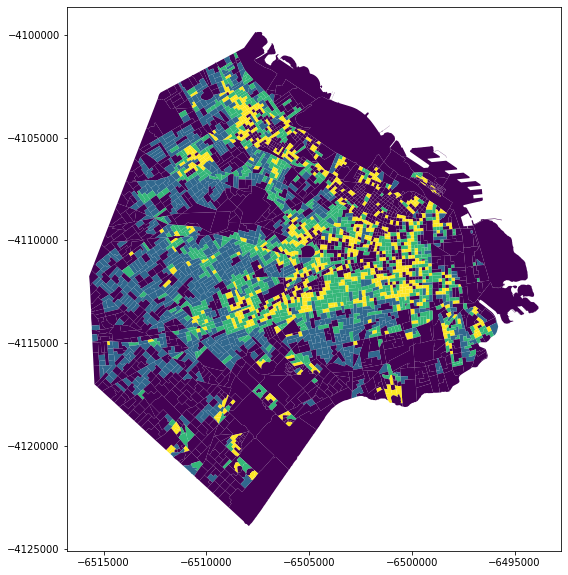

In [10]:
# Mapeo de la Densidad
censo['logRatio'] = (censo.TOT_POB/ censo.AREA)
censo.plot(column='logRatio', scheme='quantiles', figsize=(10, 10))

###  Agregar un mapa de fondo 

Este ejemplo muestra cómo puede agregar un mapa base de fondo a las parcelas creadas con el método .plot() . Esto hace uso del paquete contextual para recuperar mosaicos de mapas web de varias fuentes (OpenStreetMap, Stamen).

In [5]:
# ¿En que coordenadas están?
censo.crs

{'init': 'epsg:22183'}

In [6]:
# Las convertimos a Web-Mercator 
censo = censo.to_crs(epsg=3857)

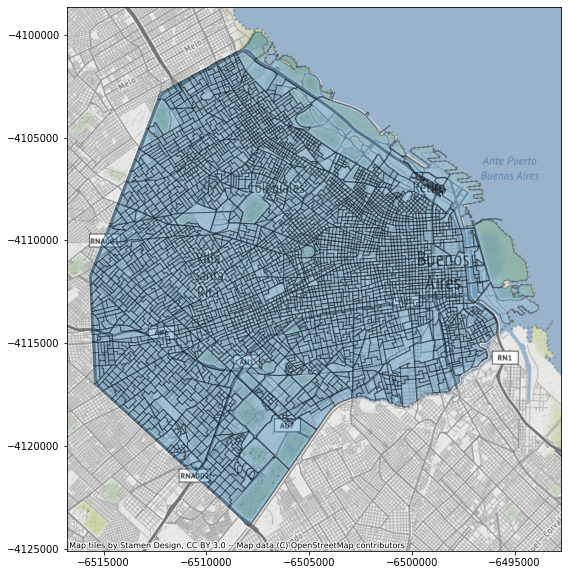

In [7]:
# Y luego mapeo
ax = censo.plot(figsize=(10, 10), alpha=0.35, edgecolor='k')
ctx.add_basemap(ax)

### Combinando varias capas

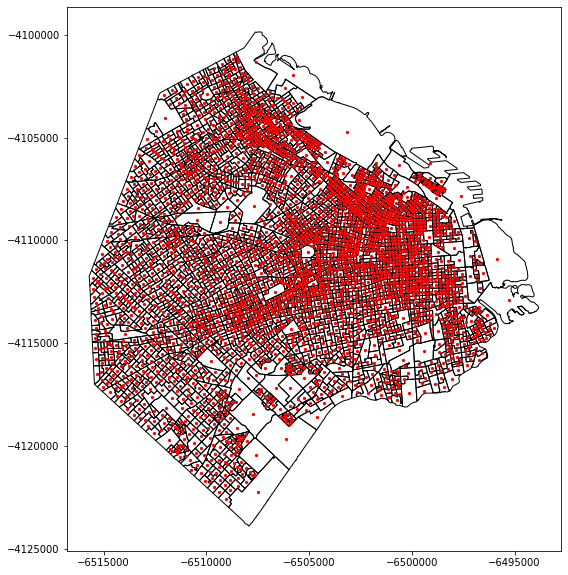

In [8]:
# calculo el centroide de cada radio
aux = censo.centroid
# ploteo mi mapa base
base = censo.plot( figsize=(10, 10), color='None', edgecolor='black')
# añado mis centroides
aux.plot(ax=base, marker='o', color='red', markersize=5)



## Agregación con disolver

Los datos espaciales a menudo son más granulares de lo que necesitamos. Por ejemplo, podríamos tener datos sobre unidades subnacionales, pero en realidad estamos interesados en estudiar patrones a nivel de países.

En un entorno no espacial, cuando todo lo que necesitamos son estadísticas resumidas de los datos, usamos la función groupby. Pero para los datos espaciales, a veces también necesitamos agregar características geométricas. En la biblioteca de geopandas, podemos agregar características geométricas usando la función dissolve .

Se puede pensar que dissolve hace tres cosas: (a) disuelve todas las geometrías dentro de un grupo dado en una sola característica geométrica (usando el método unary_union ), y (b) agrega todas las filas de datos en un grupo usando groupby.aggregate() , y (c) combina esos dos resultados. 

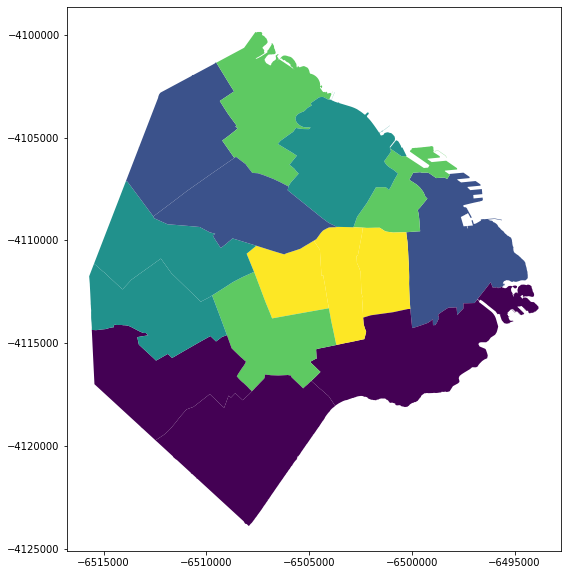

In [9]:
# Densidad a nivel Departamento. ¿MAUP?
fracciones = censo[['DEPTO','AREA','TOT_POB','geometry']].dissolve(by='DEPTO', aggfunc='sum')
fracciones['logRatio'] = (fracciones.TOT_POB/ fracciones.AREA)
fracciones.plot(column='logRatio', scheme='quantiles', figsize=(10, 10))

## Fusionar datos

Hay dos formas de combinar conjuntos de datos en geopandas : uniones de atributos y uniones espaciales.

En una unión de atributo, un GeoSeries o GeoDataFrame se combina con una Series pandas regular o un DataFrame basado en una variable común. Esto es análogo a la fusión o unión normal en pandas .

En una GeoSeries espacial, las observaciones de GeoSeries o GeoDataFrames se combinan en función de su relación espacial entre sí. 

### Por Atributo

Las uniones de atributos se logran utilizando el método de merge . En general, se recomienda utilizar el método de merge llamado desde el conjunto de datos espaciales. Dicho esto, la función de merge independiente funcionará si GeoDataFrame está en el argumento left; si un DataFrame está en el argumento left y un GeoDataFrame está en la posición right, el resultado ya no será un GeoDataFrame. 

### Uniones espaciales

En una unión espacial, dos objetos de geometría se fusionan en función de su relación espacial entre sí. 

#### Sintaxis

```python
gpd.sjoin(gpd_DF_1, gpd_DF_1, how="XXX", op='YYY')
```
sjoin.() tiene dos argumentos centrales: how y op .

##### op

El argumento op especifica cómo las geopandas deciden si unir o no los atributos de un objeto a otro. Hay tres opciones de unión diferentes de la siguiente manera:

* intersects : los atributos se unirán si el límite y el interior del objeto se cruzan de alguna manera con el límite y / o el interior del otro objeto.

* within : los atributos se unirán si el límite y el interior del objeto se cruzan solo con el interior del otro objeto (no su límite o exterior).

* contains : los atributos se unirán si el interior del objeto contiene el límite y el interior del otro objeto y sus límites no se tocan en absoluto. 

Puede leer más sobre cada tipo de combinación en la documentación de Shapely .

##### how

El argumento de cómo especifica el tipo de unión que ocurrirá y qué geometría se retiene en el geodataframe resultante. Acepta las siguientes opciones:

* left : use el índice del primer (o left_df ) geodataframe que proporcione para sjoin ; retener solo la columna de geometría left_df

* right : usa index from second (o right_df ); retener solo la columna de geometría right_df

* inner : usa la intersección de los valores de índice de ambos geodataframes; retener solo la columna de geometría left_df 


# Fuentes

Este documento es una adaptación (cual "El Hobbit" de Peter Jackson) del libro "Ciencia de Datos para Gente Sociable" de Antonio el Gris

https://bitsandbricks.github.io/ciencia_de_datos_gente_sociable/

y de la documentación oficial de Geopandas

http://geopandas.org/index.html